# Top Skills for Job Roles Subplots (2.13.3) - Problem

Problem Statement: Create a subplot with 3 rows and 1 column:

In each subplot, plot a horizontal bar chart of the top 3 job skills by the number of job postings for each job title (Senior Data Scientist, Senior Data Engineer, and Senior Data Analyst).
Use fig.tight_layout() to adjust the spacing between subplots and invert_yaxis() to invert the y-axis in each subplot.

In [4]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

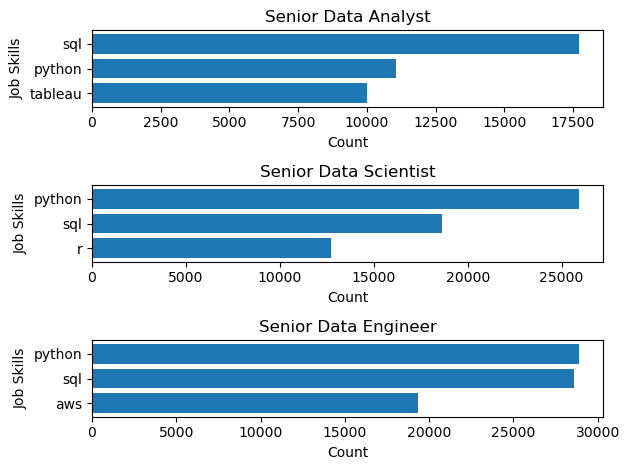

In [ ]:
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']

df_skills = df.explode('job_skills')

job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']

fig, ax = plt.subplots(len(job_roles), 1)
for i, role in enumerate(job_roles):
    role_skills = df_skills[df_skills['job_title_short'] == role]['job_skills'].value_counts().head(3)
    ax[i].barh(role_skills.index, role_skills.values)
    ax[i].set_title(role)
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('Job Skills')
    ax[i].invert_yaxis()
fig.tight_layout()
plt.show()